### Imports

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

### Step 2: Use requests and BeautifulSoup to make a list of all the CORGIS datasets.

In [3]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')
response

<Response [200]>

The relevant HTML tag to search for is "h3"

In [4]:
# Save all the html in a string variable
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# This "document" variable is an object that has a "find" method
all_datasets = document.findAll('h3')

### Step 3: Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

In [5]:
# print(all_datasets)

def dataset_to_df(dataset):
    website = "https://corgis-edu.github.io/corgis/datasets/csv/" + dataset.lower() + "/" + dataset.lower() + ".csv"
#     print(website)
    df = pd.read_csv(website)
    
    html_link = "https://corgis-edu.github.io/corgis/csv/" + dataset.lower() + "/"
    response = requests.get(html_link)
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
#     print(document)
    all_links = document.findAll('a')
#     test = all_links[20]
#     print(type(test))
#     print(test.attrs)
#     print(all_links)
    for link in all_links:
        if link.has_attr('download'):
            download_link = website + "/" + link['href']
            print(download_link)
    return df
    
dataset_to_df(all_datasets[1].get_text())


https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv/../../datasets/csv/airlines/airlines.csv


,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


### Step 4: Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

Histogram plot

https://corgis-edu.github.io/corgis/datasets/csv/music/music.csv/../../datasets/csv/music/music.csv


array([[<AxesSubplot:title={'center':'artist.hotttnesss'}>]], dtype=object)

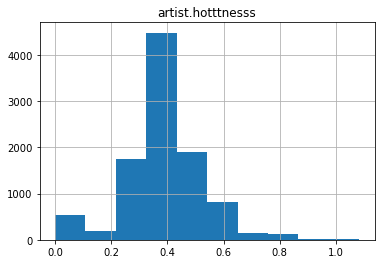

In [50]:
music_df = dataset_to_df(all_datasets[30].get_text())
music_df.head()

name_hotness = music_df[["artist.name", "artist.hotttnesss"]]
name_hotness.hist()

Bar Plot

https://corgis-edu.github.io/corgis/datasets/csv/ingredients/ingredients.csv/../../datasets/csv/ingredients/ingredients.csv


<AxesSubplot:xlabel='Category'>

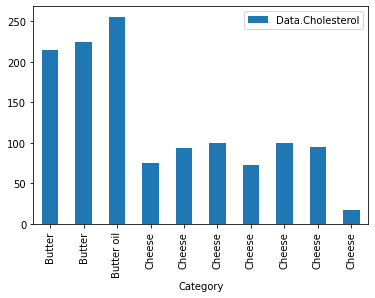

In [67]:
ingredients_df = dataset_to_df(all_datasets[26].get_text())
category_cholesterol = ingredients_df[["Category", "Data.Cholesterol"]]
category_cholesterol.head(10).plot(kind='bar', x='Category')


Line Plot

https://corgis-edu.github.io/corgis/datasets/csv/weather/weather.csv/../../datasets/csv/weather/weather.csv


<AxesSubplot:xlabel='Date.Full'>

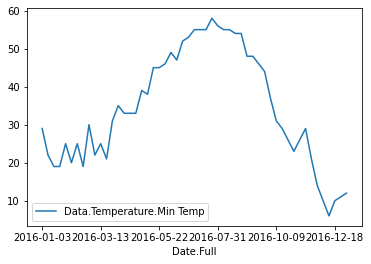

In [82]:
weather_df = dataset_to_df(all_datasets[46].get_text())
anchorage_df = weather_df[weather_df['Station.City'] == 'Anchorage']
# anchorage_df.head(10)
month_mintemp = anchorage_df[["Date.Full", "Data.Temperature.Min Temp"]]
month_mintemp.plot(x="Date.Full")